<a href="https://colab.research.google.com/github/random-words/colab-notebooks/blob/main/10__time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecatsing + Milestone Project 3

## Get data

In [74]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-02-19 21:21:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2025-02-19 21:21:20 (5.16 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



## Importing time series with Pandas


In [75]:
import pandas as pd

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [77]:
# len of samples
len(df)

2787

In [78]:
# only closing price feature needed
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


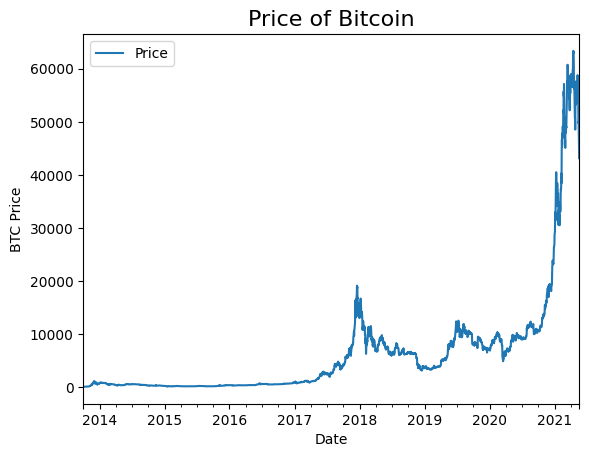

In [79]:
import matplotlib.pyplot as plt
bitcoin_prices.plot()
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin", fontsize=16)
plt.legend()

## Importing time series with Python's CSV

In [80]:
# Importing with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line wich is titles
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get dates
    btc_price.append(float(line[2])) # get closing price

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

<ipython-input-81-e93ad1f3881c>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


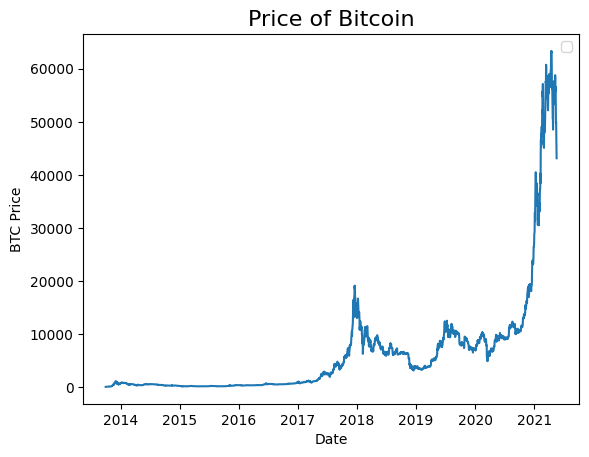

In [81]:
# Plot from CSV
import numpy as np
plt.figure()
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin", fontsize=16)
plt.legend()

## Format data part 1: Create train/test sets

### Train & test sets (wrong way)

In [82]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, prices, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

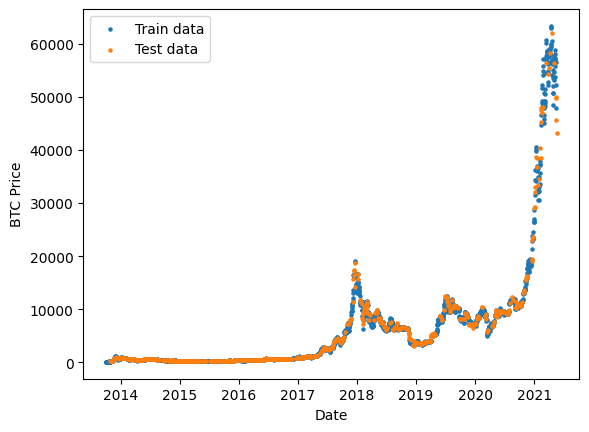

In [84]:
# Let's plot wrong splits
plt.figure()
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend()

### Train & test sets (right way)

In [85]:
prices[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [86]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

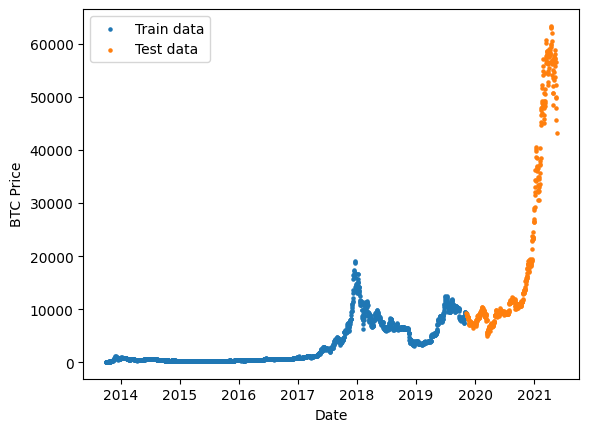

In [87]:
# Plot correctly splitted data
plt.figure()
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend()

## Create a plotting function

In [88]:
timesteps

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2021-05-16T00:00:00.000000000', '2021-05-17T00:00:00.000000000',
       '2021-05-18T00:00:00.000000000'], dtype='datetime64[ns]')

In [89]:
prices

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [90]:
X_train

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2019-11-05T00:00:00.000000000', '2019-11-06T00:00:00.000000000',
       '2019-11-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [91]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [92]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

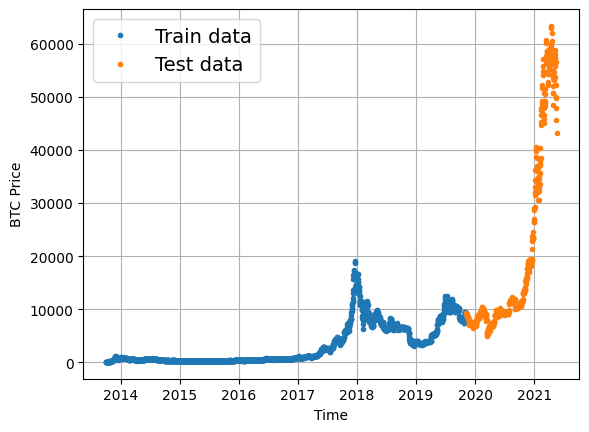

In [93]:
# Test the function
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling experiments

## Model 0: Naive forecast (baseline)

In [94]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [95]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

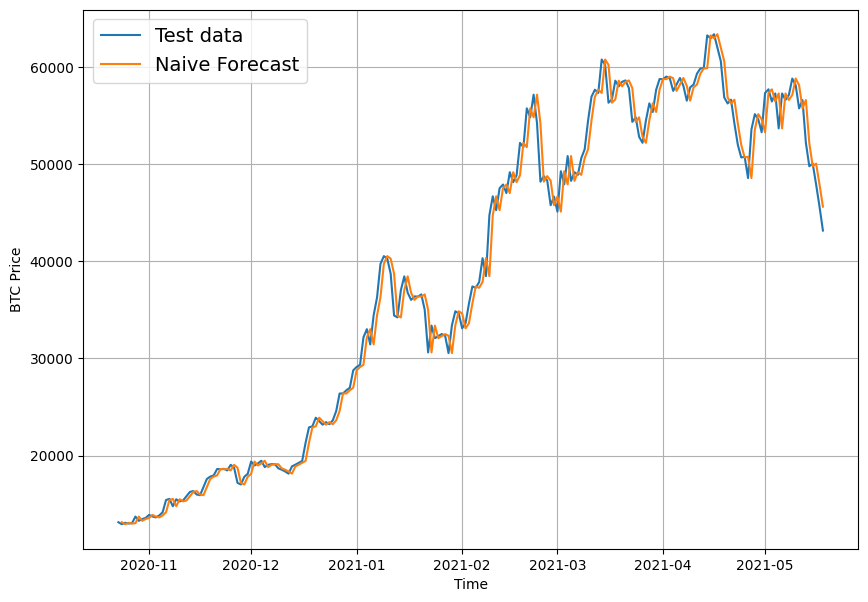

In [96]:
# Plot naive forecast
# plot_time_series(X_train, y_train, label="Train data")
plt.figure(figsize=(10, 7))
plot_time_series(X_test, y_test, label="Test data", start=350, format="-")
plot_time_series(X_test[1:], naive_forecast, format="-", label="Naive Forecast",
                 start=350)

## Evaluating a time series model

In [97]:
import tensorflow as tf

In [98]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # MAE of naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # seasonality of 1 day (hence shift of 1)

  return mae / mae_naive_no_season

In [99]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [100]:
# Create a function to return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # cast to float32 because tensorflow uses it
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate metrics
  mae = tf.keras.metrics.mae(y_true, y_pred)
  mse = tf.keras.metrics.mse(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mape(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [101]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [102]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [103]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Format Data Part 2: Windowing our dataset

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [105]:
print(f"From this: {btc_price[:7]} => to that: {btc_price[7]}")

From this: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] => to that: 123.033


In [106]:
# Setup global variables
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use past week of data to make a prediction

In [107]:
# Create a function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [108]:
tf.expand_dims(tf.range(8), axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [109]:
# Test function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [110]:
# Create a function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  # Create as window
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # Create a 2D array of window_steps (-1 for 0-indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create as 2D array of windows of window_size size
  # print(window_indexes, window_indexes.shape)

  # Index the target array with 2D array of widow steps
  windowed_array = x[window_indexes]
  # print(windowed_array.shape)

  # Get labelled windows
  windows, labels = get_labelled_windows(windowed_array)
  return windows, labels

In [111]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [112]:
len(prices)

2787

In [113]:
# First 3
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [114]:
# Last 3
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [115]:
prices[-1:]

array([43144.47129086])

## Turning windows into train & test datasets

In [116]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [117]:
# Make train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1 - test_split)) # default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [118]:
# Create train/test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [119]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [120]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [121]:
# if train array's the same as before
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

In [122]:
import os

# Create a function to create a ModelCheckpoint callback with a filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  full_path = save_path + "/" + model_name + ".keras"
  return tf.keras.callbacks.ModelCheckpoint(filepath=full_path,
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense Model (window = 7, horizon = 1)

In [123]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

# Construct Model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# Fit model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 2476.3088 - mae: 2476.3088 - mse: 15769119.0000 - val_loss: 2286.4426 - val_mae: 2286.4426 - val_mse: 11583395.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 332.9841 - mae: 332.9841 - mse: 431097.8750 - val_loss: 1214.6794 - val_mae: 1214.6794 - val_mse: 4108880.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 226.8609 - mae: 226.8609 - mse: 232236.1250 - val_loss: 1070.6143 - val_mae: 1070.6143 - val_mse: 3783463.2500
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 186.2959 - mae: 186.2959 - mse: 169042.2812 - val_loss: 994.9177 - val_mae: 994.9177 - val_mse: 3326542.7500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 174.9491 - mae: 174.9491 - mse: 159593.4375 - val_loss: 994.7020 - val_mae: 994.7020 - val_mse: 3196539.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 170.0527 - mae: 170.0527 - mse: 154194.5938 - val_loss: 998.0505 - val_mae: 998.0505

In [124]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [125]:
# Evaluate on test data
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 287.3589 - mae: 287.3589 - mse: 347293.3125


[570.1109619140625, 570.1109619140625, 1169649.0]

In [126]:
# Load in saved best performing model_1 and evaluate
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 284.7590 - mae: 284.7590 - mse: 346778.9062


[565.9271850585938, 565.9271850585938, 1164244.625]

## Making forecast

In [127]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # 1D array of preds

In [128]:
# Make preds
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8863.415 , 8782.332 , 9021.774 , 8808.64  , 8746.5625, 8710.464 ,
        8692.962 , 8550.655 , 8441.872 , 8533.058 ], dtype=float32)>)

In [129]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([556]), TensorShape([556]))

In [130]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 565.92725,
 'mse': 1164244.8,
 'rmse': 1079.0017,
 'mape': 2.5573826,
 'mase': 0.9941774}

In [131]:
test_labels.shape

(556, 1)

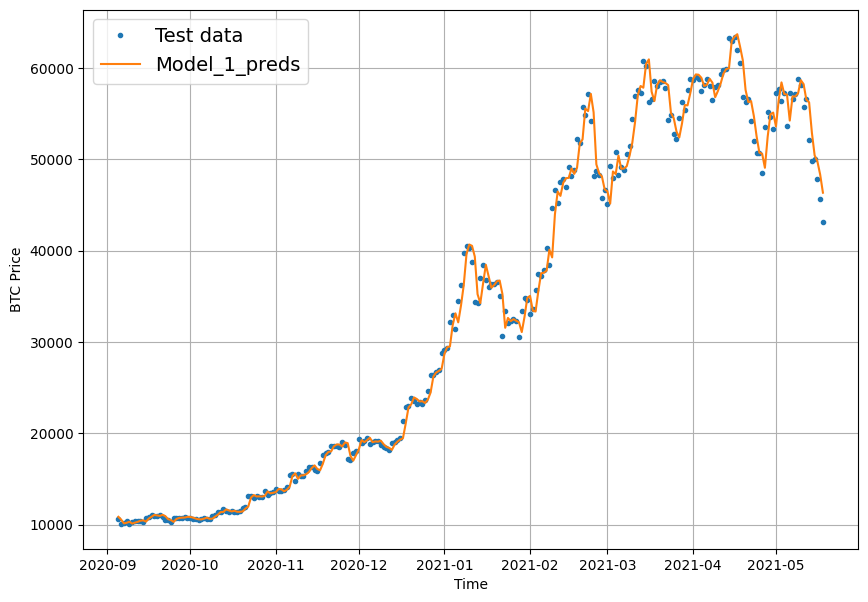

In [132]:
# Plot preds
offset=300
plt.figure(figsize=(10, 7))
# Ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],
                 start=offset, label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds, format="-",
                 start=offset, label="Model_1_preds")

## Model 2: Dense Model (window = 30, horizon = 1)

In [133]:
HORIZON = 1
WINDOW_SIZE = 30

In [134]:
# Make appropriate sizes for data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [135]:
# Make train test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [143]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,
                             test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [144]:
# Evaluate on test data
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 318.3828 - mae: 318.3828 - mse: 391119.9688


[623.1326293945312, 623.1326293945312, 1277904.375]

In [145]:
# Load pest performing model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 310.7321 - mae: 310.7321 - mse: 368498.1875


[605.785888671875, 605.785888671875, 1221473.5]

In [149]:
# Get forecast preds
model_2_preds = make_preds(model_2,
                           test_windows)
model_2_preds[:3]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([8909.682, 8935.875, 8800.961], dtype=float32)>

In [153]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 605.7859,
 'mse': 1221473.5,
 'rmse': 1105.2029,
 'mape': 2.7742414,
 'mase': 1.0589195}

In [154]:
model_1_results

{'mae': 565.92725,
 'mse': 1164244.8,
 'rmse': 1079.0017,
 'mape': 2.5573826,
 'mase': 0.9941774}

In [155]:
X_test[:10]

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000'],
      dtype='datetime64[ns]')

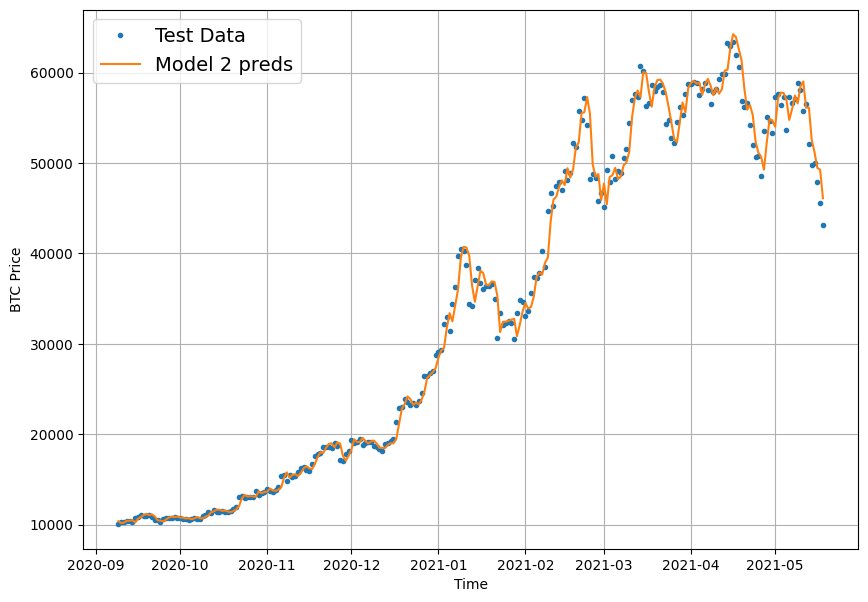

In [157]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],
                 start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds,
                 start=offset, label="Model 2 preds", format="-")

## Model 3: Dense (window=30, horizon=7)

In [173]:
HORIZON = 7
WINDOW_SIZE = 30

In [174]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [175]:
# Create train/test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [176]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows,
                             test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2509.0967 - val_loss: 3439.9446
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 649.1260 - val_loss: 2568.8857
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 442.9547 - val_loss: 2007.5299
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 378.9708 - val_loss: 1759.2371
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 338.5289 - val_loss: 1608.8940
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 313.9989 - val_loss: 1527.4597
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 282.8252 - val_loss: 1359.1167
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 264.4608 - val_loss: 1231.8046
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 248.0634 - val_loss: 1183.9061
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 244.9796 - val_loss: 1124.1492
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 230.5047 - val_loss: 1113.4535
Epo

In [177]:
# Evaluate
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 351.9205 


687.0916748046875

In [178]:
# Load best model
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense.keras")
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 342.0027  


675.483154296875

In [179]:
# Make preds
model_3_preds = make_preds(model_3,
                           test_windows)
model_3_preds[:3]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[8633.862 , 8604.6045, 8703.14  , 8662.845 , 8648.948 , 8658.115 ,
        8507.09  ],
       [8569.921 , 8778.233 , 8659.981 , 8600.431 , 8840.414 , 8622.894 ,
        8628.294 ],
       [8356.243 , 8639.292 , 8496.962 , 8447.609 , 8729.562 , 8533.024 ,
        8641.308 ]], dtype=float32)>

In [187]:
model_3_preds.shape

TensorShape([551, 7])

In [189]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  40.93792 ,  170.809   ,  118.358955,  161.43346 ,  211.34055 ,
         107.16999 ,   87.23214 ,  368.45187 ,  518.71893 ,  150.80699 ,
         216.80057 ,  123.531044,   71.41622 ,  358.88168 ,  109.78593 ,
         396.6569  ,   83.47942 ,  210.00076 ,  169.93422 ,   83.61991 ,
         132.36711 ,  133.3464  ,  227.41183 ,  147.2463  ,   63.44873 ,
         187.45549 ,  164.80908 ,  121.37618 ,   97.188194,   58.675293,
         179.02846 ,   63.839287,  264.38943 ,  381.81012 ,  690.91016 ,
          97.69427 ,   76.71317 ,  150.3969  ,  110.23884 ,   94.25579 ,
          44.682964,   71.88065 ,   65.01054 ,   75.78278 ,   77.044014,
          85.947685,  101.10547 ,   99.47412 ,   55.39251 ,  230.1342  ,
         270.13455 ,  149.23396 ,   92.77372 ,  331.81662 ,  540.3554  ,
         192.72615 ,  314.3054  ,  224.22949 ,   67.37493 ,   68.580635,
         131.00662 ,  597.52167 ,  331.75082 ,   94.72991 ,  152.11705 ,
          55.80734 ,  349.62485 ,  237.02092

## Make evaluation function works for larger horizons

In [193]:
model_3_results["mae"].ndim

1

In [192]:
model_2_results["mae"].ndim

0

In [194]:
tf.reduce_mean(model_3_results["mae"]).numpy()

675.4831

In [195]:
# Create a function to return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # cast to float32 because tensorflow uses it
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate metrics
  mae = tf.keras.metrics.mae(y_true, y_pred)
  mse = tf.keras.metrics.mse(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mape(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for higher metrics (for longer horizons)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [197]:
# Get aggregated results from model_3
model_3_results = evaluate_preds(y_true=test_labels,
                                 y_pred=model_3_preds)
model_3_results

{'mae': 675.4831,
 'mse': 1505366.9,
 'rmse': 715.98755,
 'mape': 3.055893,
 'mase': 1.1789542}

In [202]:
model_3_preds[:3]

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[8633.862 , 8604.6045, 8703.14  , 8662.845 , 8648.948 , 8658.115 ,
        8507.09  ],
       [8569.921 , 8778.233 , 8659.981 , 8600.431 , 8840.414 , 8622.894 ,
        8628.294 ],
       [8356.243 , 8639.292 , 8496.962 , 8447.609 , 8729.562 , 8533.024 ,
        8641.308 ]], dtype=float32)>

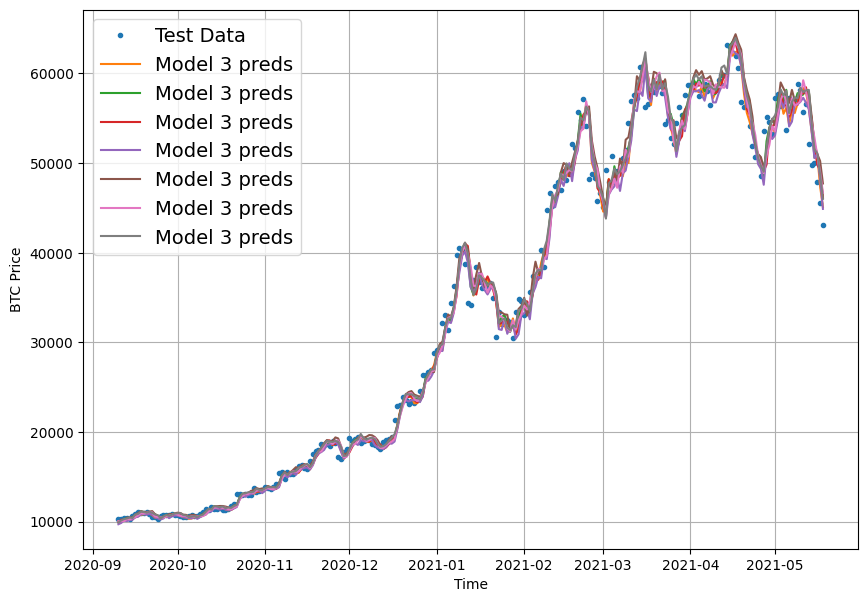

In [201]:
# Plot results
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],
                 start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds,
                 start=offset, label="Model 3 preds", format="-")

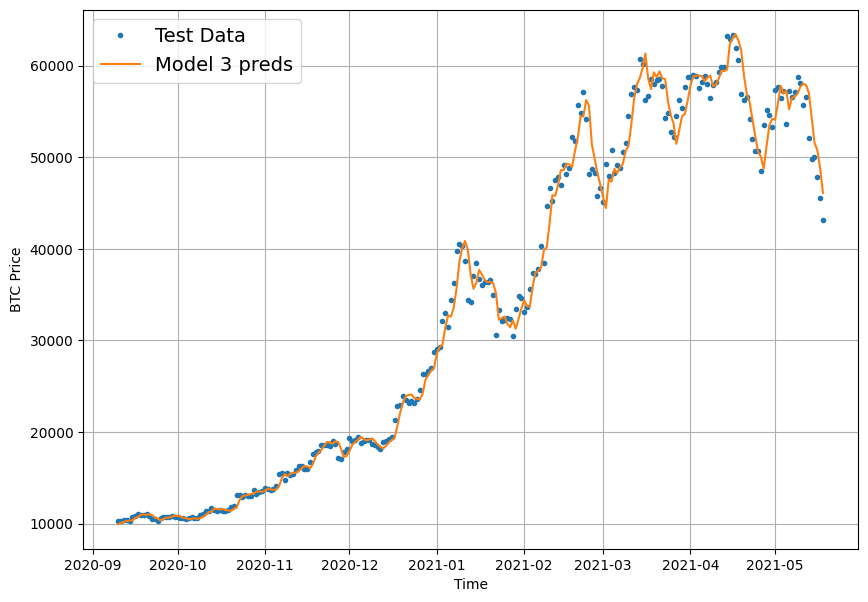

In [203]:
# Plot results
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0],
                 start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset, label="Model 3 preds", format="-")

## Creating DataFrame from all of models results

In [207]:
import pandas as pd

In [206]:
naive_results, model_1_results, model_2_results, model_3_results

({'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.5165248,
  'mase': 0.99957},
 {'mae': 565.92725,
  'mse': 1164244.8,
  'rmse': 1079.0017,
  'mape': 2.5573826,
  'mase': 0.9941774},
 {'mae': 605.7859,
  'mse': 1221473.5,
  'rmse': 1105.2029,
  'mape': 2.7742414,
  'mase': 1.0589195},
 {'mae': 675.4831,
  'mse': 1505366.9,
  'rmse': 715.98755,
  'mape': 3.055893,
  'mase': 1.1789542})

<Axes: >

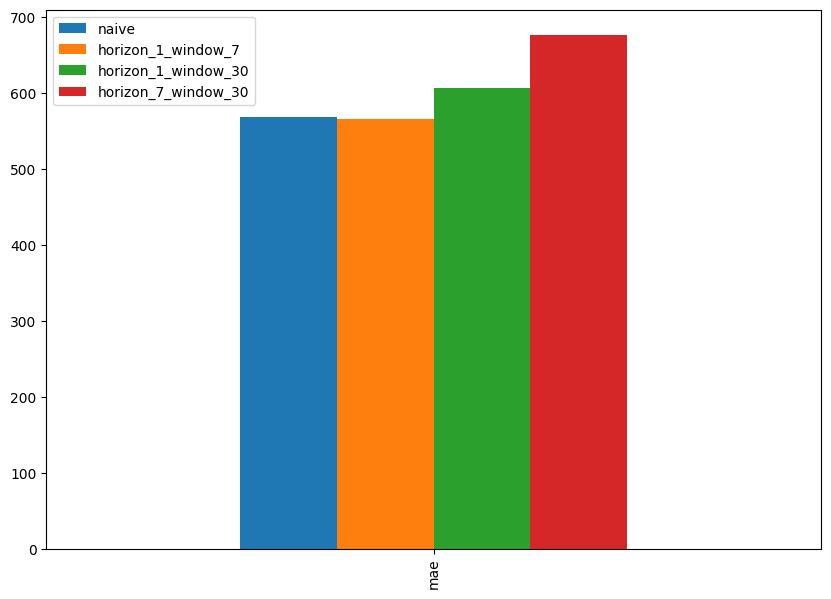

In [213]:
df = pd.DataFrame({"naive":naive_results["mae"],
                   "horizon_1_window_7":model_1_results["mae"],
                   "horizon_1_window_30":model_2_results["mae"],
                   "horizon_7_window_30":model_3_results["mae"]},
                  index=["mae"])
df.plot(figsize=(10, 7), kind="bar")

## Model 4: Conv1D

In [214]:
HORIZON = 1
WINDOW_SIZE = 7

In [217]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [218]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [219]:
# Check data input shape
train_windows[0].shape

(7,)

In [220]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [221]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [222]:
# Test lambda layer
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]
